# Stock Market Analysis for Tech Giants

In this project, we will analyze 
information, visulaize it, analyze risks based of it's performance history.

Here are questions we will try to answer:
1. What was the change of price over time?
2. What was the daily return on average of a stock?
3. What was the moving average of various stock?
4. What is the correlation between daily returns of different stock?
5. How much value do we put at risk by investing in a stock?
6. How can we attempt to predict future behavior?

First, We need to mount my notebook to your Google Drive to save it.

If you do not save, my notebook will be deleted after a number of hours

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Check your files: Make sure the existence of your file in your Drive.

In [ ]:
import os 
path_Data='//content//gdrive//MyDrive//First Pratice//'
checkPath=os.path.isdir(path_Data)
print(checkPath)
checkA=os.path.isfile(path_Data+'Stock market Problem//AAPL.csv')
checkG=os.path.isfile(path_Data+'Stock market Problem//GOOG.csv')
checkM=os.path.isfile(path_Data+'Stock market Problem//MSFT.csv')
print(checkA,checkG,checkM)

True
True True True


Take data from CSV file and see its types and shapes

In [ ]:
import pandas as pd 

AAPL = pd.read_csv(path_Data + 'Stock market Problem//AAPL.csv')
GOOG= pd.read_csv(path_Data + 'Stock market Problem//GOOG.csv')
MSFT=pd.read_csv(path_Data + 'Stock market Problem//MSFT.csv')

print(type(AAPL),type(GOOG),type(MSFT))
print("AAPL: ",AAPL.shape,AAPL.shape[0],AAPL.shape[1])
print("GOOG: ",GOOG.shape,GOOG.shape[0],GOOG.shape[1])
print("MSFT: ",MSFT.shape,MSFT.shape[0],MSFT.shape[1])


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
AAPL:  (252, 7) 252 7
GOOG:  (252, 7) 252 7
MSFT:  (252, 7) 252 7


Take a quick look at your data

In [ ]:
display(AAPL.head())
display(GOOG.tail())
display(MSFT.head(3))


,Date,High,Low,Open,Close,Volume,Adj Close
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.255997
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.783936
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.444603
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.720840
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308266


,Date,High,Low,Open,Close,Volume,Adj Close
247,2020-12-21,1740.849976,1699.000000,1713.510010,1739.369995,1828400,1739.369995
248,2020-12-22,1737.405029,1712.574951,1734.430054,1723.500000,936700,1723.500000
249,2020-12-23,1747.989990,1725.040039,1728.109985,1732.380005,1033800,1732.380005
250,2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976
251,2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1392500,1776.089966


,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,155.938049
1,2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,156.046890
2,2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,158.936279


From this table, we can see our data has 7 columns and 251 rows and values in this table is so nice 

In [ ]:
AAPL['Adj Close'] = AAPL['Adj Close'].round(decimals=3)
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308


Have a general view:
- **Count**: Count number of non-NA/null observations.
- **Mean**:  The sum of all of the data values divided by the number of data values.
- **Std**: Standard deviation (In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values.[1] A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.)
- **25%, 50%, 75%**: For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.
- **Min, Max** is Min, Max ^^

In [ ]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,96.001984,93.270486,94.602609,94.713581,1.529956e+08,94.404163
std,21.794985,21.274377,21.688715,21.527714,7.279392e+07,21.670569
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744000
25%,77.602499,75.740623,76.339378,77.219378,1.055816e+08,76.653250
50%,92.018749,89.814999,91.051250,91.113747,1.372656e+08,90.793000
75%,117.040625,113.973751,115.587502,115.545626,1.830576e+08,115.346500
max,137.979996,133.509995,137.589996,136.690002,4.268848e+08,136.690000


Some concepts in statistics and its code in Python: Mean, Median, Std 

**Median**: The middle number in a set of data when the data is arranged in ascending (this is more common) or descending order. If there are an even number of values in the data set, the median is the arithmetic mean of the two middle numbers. Thus, the median separates the lower and higher half of a data set.

In [ ]:
import statistics
adjValues=AAPL['Adj Close'].values
mean_value=statistics.mean(adjValues)
median_value=statistics.median(adjValues)
std_value=statistics.stdev(adjValues)
print(mean_value,median_value,std_value)

94.4041626984127 90.793 21.670569203849773


**Data visualization**:  An accessible way to see and understand trends, outliers, and patterns in data.

**Seaborn**: A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


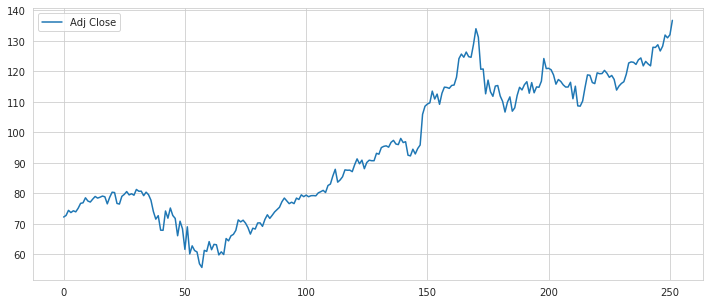

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

AAPL['Adj Close'].plot(legend = True,figsize=(12,5))

Create some new columns to know values of a group of data.

In stock market, people usually use data by day, month, year but in this example I want to know group of 10, 20, 50 days 

In [ ]:
ma = 10
column_name = 'MA %s days' %(str(ma))
AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma,center=False).mean()

ma = 20
column_name = 'MA %s days' %(str(ma))
AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma,center=False).mean()

ma = 50
column_name = 'MA %s days' %(str(ma))
AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma,center=False).mean()

Take a look at new columns

The NaN values in new columns is Okay because you can have the values of 10 days when you are in the first day 

In [ ]:
AAPL.head(55)

,Date,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256,NaN,NaN,NaN
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784,NaN,NaN,NaN
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445,NaN,NaN,NaN
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721,NaN,NaN,NaN
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308,NaN,NaN,NaN
5,1/7/2020,75.224998,74.370003,74.959999,74.597504,108872000,73.959,NaN,NaN,NaN
6,1/8/2020,76.110001,74.290001,74.290001,75.797501,132079200,75.149,NaN,NaN,NaN
7,1/9/2020,77.607498,76.550003,76.809998,77.407501,170108400,76.745,NaN,NaN,NaN
8,1/10/2020,78.167503,77.062500,77.650002,77.582497,140644800,76.918,NaN,NaN,NaN
9,1/13/2020,79.267502,77.787498,77.910004,79.239998,121532000,78.562,74.8847,NaN,NaN


Visualize it.

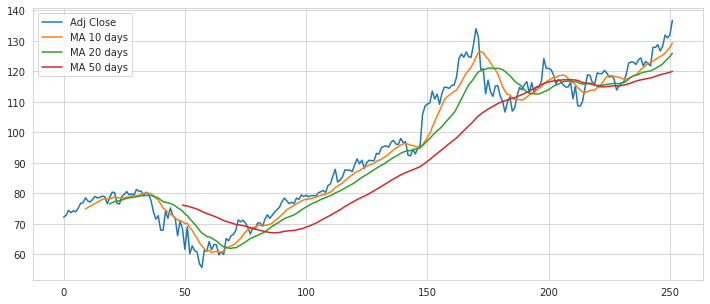

In [ ]:
AAPL[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))

In order calculate daily return, we can use the percentage change of the adjusted closing price.

In [ ]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days,Daily Return
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256,NaN,NaN,NaN,NaN
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784,NaN,NaN,NaN,0.007307
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445,NaN,NaN,NaN,0.022821
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721,NaN,NaN,NaN,-0.009725
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308,NaN,NaN,NaN,0.007962


Let us now plot the daily return

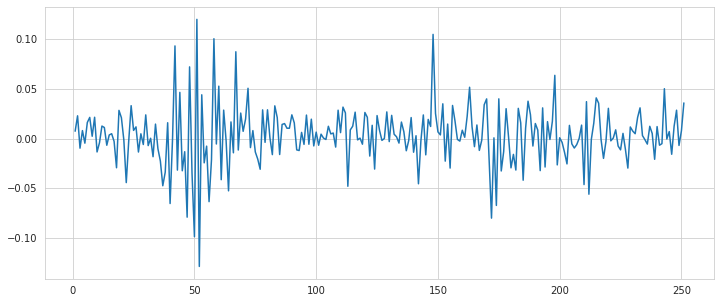

In [ ]:
AAPL['Daily Return'].plot(figsize=(12,5))

**argmax()** function returns indices of the max element of the array in a particular axis.

**max()** function returns value of the max element of the array in a particular axis.



In [ ]:
pos = AAPL['Daily Return'].argmax()
max =AAPL['Daily Return'].max()
print(pos,max,AAPL.loc[pos,"Daily Return"])

51 0.11981125956674044 0.11981125956674044


**Pandas** is seriously a game changer when it comes to cleaning, transforming, manipulating and analyzing data. In simple terms, Pandas helps to clean the mess.

In [ ]:
all_stocks=pd.DataFrame(columns=['Apple','Google','Microsoft'],index=AAPL['Date'])


In [ ]:
all_stocks['Apple']=AAPL['Adj Close'].values
all_stocks['Google']=GOOG['Adj Close'].values
all_stocks['Microsoft']=MSFT['Adj Close'].values


In [ ]:
all_stocks.head()

,Apple,Google,Microsoft
Date,,,
12/30/2019,72.256,1336.140015,155.938049
12/31/2019,72.784,1337.020020,156.046890
1/2/2020,74.445,1367.369995,158.936279
1/3/2020,73.721,1360.660034,156.957260
1/6/2020,74.308,1394.209961,157.362961


Using heatmap to understand the correlation between various features of a data frame.

In the heatmap, dark colors show good marks, and light color shows bad marks. Heatmaps adjust the brightness of the color according to the highest and lowest marks in the dataset. The highest score is represented by the darkest color and the lowest score by the brightest color.

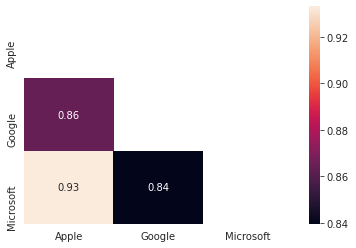

In [ ]:
import numpy as np 
corr = all_stocks.dropna().corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask=mask)

This heatmap show me that if stock of Apple increase, there will be 93% stock of Micresoft increase and vice versa.